In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from numbers import Number   

In [3]:
data = pd.read_excel('/Users/kunalranjan/Documents/Clustering.xls')
s1=data['Comments']

In [4]:
s1.head()

0          english,  hindi,  sanskrit,  hindi ;english
1                              1 year,  admin incharge
2    system administratio,  networking,  linux gene...
3                                         mdms manager
4    planning and scheduling,  speaking,  writing, ...
Name: Comments, dtype: object

In [5]:
type(s1)


pandas.core.series.Series

In [6]:
#df1 = s1.dropna(subset=['Comments'], inplace=True)
df1 = s1.str.replace('\d', '')
df1 = df1.where((pd.notnull(df1)), 'Blanks')

In [7]:
df1.head()

0          english,  hindi,  sanskrit,  hindi ;english
1                                year,  admin incharge
2    system administratio,  networking,  linux gene...
3                                         mdms manager
4    planning and scheduling,  speaking,  writing, ...
Name: Comments, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer()
s = vectorizer.fit_transform(df1)
s.shape

(2549, 2928)

#### WCSS
Within cluster sum of squares

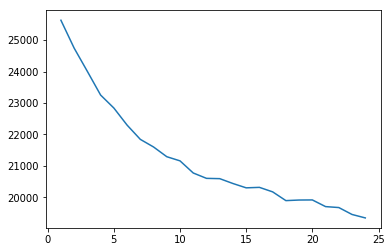

In [9]:
############################# KMeans #################################################
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,25):
    #print(i)
    kmeans= KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
    kmeans.fit(s)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,25),wcss)
plt.show()

#### Depending on the curve obtained - we can choose the optimal number of clusters to be formed. 
From the Graph above we could see that the optimal number of the clusters to be formed from this dataset is around 10-15 since the error is not decreasing significantly. So we could choose 15 as optimal number of cluster for this problem.

In [10]:
kmeans = KMeans(n_clusters=15, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
y_kmeans = kmeans.fit_predict(s)

In [13]:
y_kmeans

array([5, 5, 7, ..., 9, 5, 5], dtype=int32)

###### y_kmeans contains the cluster of documents

### Hierarchical clustering


In [ ]:
import sys
sys.setrecursionlimit(100)
import scipy.cluster.hierarchy as sch


dendogram = sch.dendrogram(sch.linkage(s.todense(), method= 'ward'))

plt.show()

**Limitation-** It does not work for large datasets